In [23]:
!pip install transformers

In [24]:
import torch

In [25]:
from transformers import BertForQuestionAnswering

In [26]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
from transformers import BertTokenizer

In [28]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/opt/anaconda3/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [29]:
question = " How many parameters does BERT-large have ? "

answer_text = " BERT-large is really big... it has 24-layers and an embedding size of 1024, for a total of 340M paramters! All together is is 1.34 Gb, so it is expect to take couple of minutes to download to your colab instance."

In [30]:
input_ids = tokenizer.encode(question, answer_text)

In [31]:
print(input_ids)

[101, 2129, 2116, 11709, 2515, 14324, 1011, 2312, 2031, 1029, 102, 14324, 1011, 2312, 2003, 2428, 2502, 1012, 1012, 1012, 2009, 2038, 2484, 1011, 9014, 1998, 2019, 7861, 8270, 4667, 2946, 1997, 9402, 2549, 1010, 2005, 1037, 2561, 1997, 16029, 2213, 11498, 20492, 2545, 999, 2035, 2362, 2003, 2003, 1015, 1012, 4090, 16351, 1010, 2061, 2009, 2003, 5987, 2000, 2202, 3232, 1997, 2781, 2000, 8816, 2000, 2115, 15270, 2497, 6013, 1012, 102]


In [32]:
token_to_ids = tokenizer.convert_ids_to_tokens(input_ids)

In [33]:
for token, id in zip(token_to_ids, input_ids):
    print(token, id)

[CLS] 101
how 2129
many 2116
parameters 11709
does 2515
bert 14324
- 1011
large 2312
have 2031
? 1029
[SEP] 102
bert 14324
- 1011
large 2312
is 2003
really 2428
big 2502
. 1012
. 1012
. 1012
it 2009
has 2038
24 2484
- 1011
layers 9014
and 1998
an 2019
em 7861
##bed 8270
##ding 4667
size 2946
of 1997
102 9402
##4 2549
, 1010
for 2005
a 1037
total 2561
of 1997
340 16029
##m 2213
para 11498
##mt 20492
##ers 2545
! 999
all 2035
together 2362
is 2003
is 2003
1 1015
. 1012
34 4090
gb 16351
, 1010
so 2061
it 2009
is 2003
expect 5987
to 2000
take 2202
couple 3232
of 1997
minutes 2781
to 2000
download 8816
to 2000
your 2115
cola 15270
##b 2497
instance 6013
. 1012
[SEP] 102


In [34]:
sep_index = input_ids.index(tokenizer.sep_token_id)
num_seg_a = sep_index+1
print(num_seg_a)

11


In [35]:
num_seg_b = len(input_ids) - num_seg_a
print(num_seg_b)

61


In [36]:
segment_ids = [0]*num_seg_a + [1]*num_seg_b
print(segment_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [37]:
outputs = model(torch.tensor([input_ids]),
               token_type_ids = torch.tensor([segment_ids]),
               return_dict = True)

In [38]:
start_probs = outputs.start_logits
end_probs = outputs.end_logits

In [39]:
print(start_probs)

tensor([[-6.3478e+00, -6.9138e+00, -8.1047e+00, -8.7394e+00, -7.7783e+00,
         -8.1243e+00, -8.4975e+00, -8.5889e+00, -7.7946e+00, -9.2539e+00,
         -6.3477e+00, -2.1958e+00, -6.4322e+00, -5.7570e+00, -7.8203e+00,
         -6.9660e+00, -6.5047e+00, -7.0825e+00, -7.0545e+00, -7.2734e+00,
         -4.5859e-03, -3.4281e+00,  2.5745e+00, -5.1820e+00, -3.0620e+00,
         -6.1087e+00, -3.4391e+00, -3.8834e+00, -5.6927e+00, -6.1381e+00,
         -4.6189e+00, -5.9074e+00,  1.1066e-01, -3.9634e+00, -6.0663e+00,
         -2.1983e+00, -1.0700e+00, -1.0655e+00, -4.6057e+00,  2.5624e+00,
         -4.6132e+00, -4.3042e+00, -6.1032e+00, -5.1508e+00, -5.4636e+00,
         -4.2930e+00, -6.3541e+00, -7.3043e+00, -6.1387e+00, -1.2224e+00,
         -7.1127e+00, -4.1152e+00, -5.4304e+00, -8.0563e+00, -6.7456e+00,
         -6.4555e+00, -8.5198e+00, -6.6078e+00, -7.8773e+00, -6.6828e+00,
         -5.9788e+00, -8.5357e+00, -6.9493e+00, -8.4013e+00, -6.5563e+00,
         -8.1844e+00, -7.4561e+00, -5.

In [40]:
start_index = torch.argmax(start_probs)
end_index = torch.argmax(end_probs)
print(start_index)

tensor(22)


In [41]:
answer = ' '.join(token_to_ids[start_index : end_index+1])

In [42]:
print(answer)

24 - layers and an em ##bed ##ding size of 102 ##4 , for a total of 340 ##m para ##mt ##ers


In [43]:
answer = token_to_ids[start_index]
for i in range(start_index+1, end_index+1):
    if token_to_ids[i][0:2] == '##':
        answer+=token_to_ids[i][2:]
    else:
        answer+=' '+token_to_ids[i]
print(answer)

24 - layers and an embedding size of 1024 , for a total of 340m paramters


In [44]:
labels = []
for (ids, token) in enumerate(token_to_ids):
    labels.append('{:} - {:>2}'.format(token, ids))

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
plt.figure(figsize=(16, 16))

<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

/var/folders/cj/0w5hsz6d7hsgpdmwp3dwlw2w0000gn/T/ipykernel_23693/2006722649.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center")


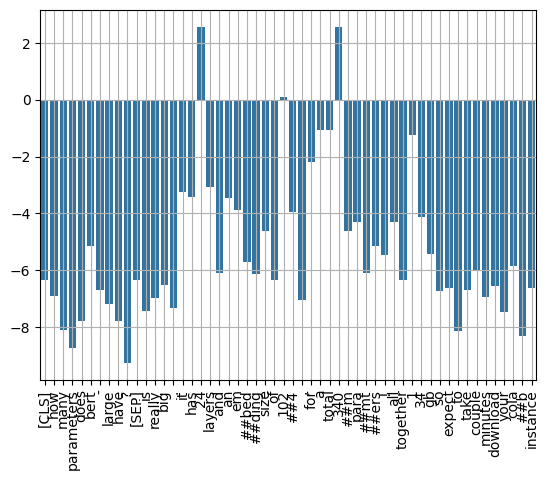

In [48]:
s = start_probs.detach().numpy().flatten()
ax = sns.barplot(x = token_to_ids, y = s, errorbar = None)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center")
ax.grid(True)